In [16]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [15]:
df=pd.read_csv("Data\\breast_cancer_wisconsin_data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


cost after 0 iteration : 0.693147
cost after 10 iteration : 0.676691
cost after 20 iteration : 0.668270
cost after 30 iteration : 0.660128
cost after 40 iteration : 0.652254
cost after 50 iteration : 0.644635
cost after 60 iteration : 0.637263
cost after 70 iteration : 0.630127
cost after 80 iteration : 0.623219
cost after 90 iteration : 0.616528
cost after 100 iteration : 0.610046
cost after 110 iteration : 0.603764
cost after 120 iteration : 0.597675
cost after 130 iteration : 0.591770
cost after 140 iteration : 0.586042
cost after 150 iteration : 0.580484
cost after 160 iteration : 0.575089
cost after 170 iteration : 0.569850
cost after 180 iteration : 0.564761
cost after 190 iteration : 0.559816
cost after 200 iteration : 0.555009
cost after 210 iteration : 0.550335
cost after 220 iteration : 0.545789
cost after 230 iteration : 0.541365
cost after 240 iteration : 0.537058
cost after 250 iteration : 0.532865
cost after 260 iteration : 0.528780
cost after 270 iteration : 0.524801
cos

cost after 3170 iteration : 0.268875
cost after 3180 iteration : 0.268648
cost after 3190 iteration : 0.268422
cost after 3200 iteration : 0.268197
cost after 3210 iteration : 0.267973
cost after 3220 iteration : 0.267750
cost after 3230 iteration : 0.267528
cost after 3240 iteration : 0.267307
cost after 3250 iteration : 0.267087
cost after 3260 iteration : 0.266868
cost after 3270 iteration : 0.266650
cost after 3280 iteration : 0.266433
cost after 3290 iteration : 0.266217
cost after 3300 iteration : 0.266002
cost after 3310 iteration : 0.265788
cost after 3320 iteration : 0.265575
cost after 3330 iteration : 0.265363
cost after 3340 iteration : 0.265152
cost after 3350 iteration : 0.264942
cost after 3360 iteration : 0.264732
cost after 3370 iteration : 0.264524
cost after 3380 iteration : 0.264316
cost after 3390 iteration : 0.264110
cost after 3400 iteration : 0.263904
cost after 3410 iteration : 0.263699
cost after 3420 iteration : 0.263495
cost after 3430 iteration : 0.263292
c

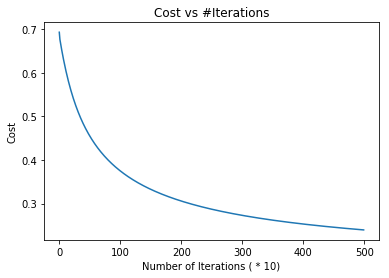

In [13]:
#Dropping the 'id' column from the dataset
df=df.drop("id",1)
df=df.drop("Unnamed: 32",1)
    
#Mapping M to 1 and B to 0 in the output Label DataFrame
df['diagnosis']=df['diagnosis'].map({'M':1,'B':0})
    
    
#Split Data into training and test (70% and 30%)
train, test = train_test_split(df, test_size = 0.9, random_state=1)

#Training Data
train_x=train.loc[:,'radius_mean' : 'fractal_dimension_worst']
train_y=train.loc[:,['diagnosis']]
    
#Testing Data
test_x=test.loc[:,'radius_mean' : 'fractal_dimension_worst']
test_y=test.loc[:,['diagnosis']]
    
#Converting Traing and Test Data to numpy array
train_x=np.asarray(train_x)
train_y=np.asarray(train_y)
test_x=np.asarray(test_x)
test_y=np.asarray(test_y)


#Function to initialize the weights and bias
def initialize(m):
    
    w = np.zeros((m,1))
    b = 0
    
    return w , b
    
#Function to calculate sigmoid of x    
def sigmoid(X):
    return 1/(1 + np.exp(- X))    


#Function for doing forward and back propogation
def propogate(X, Y, w, b):
    
    m = X.shape[1] #Number of training examples

    #Forward Propogation, calculating the cost
    Z = np.dot(w.T, X) + b;    
    A = sigmoid(Z)
    cost= -(1/m) * np.sum(Y * np.log(A) + (1-Y) * np.log(1-A))
    
    #Back Propogation , calculating the gradients
    dw = (1/m)* np.dot(X, (A-Y).T)
    db = (1/m)* np.sum(A-Y)
    
    grads= {"dw" : dw, "db" : db}
    
    return grads, cost
    
    


#Function for performing Grdient Descent
def optimize(X, Y, w, b, num_of_iterations, alpha):
    
    costs=[] 
    
    for i in range(num_of_iterations):
 
        grads, cost = propogate(X, Y, w, b)
        
        dw = grads["dw"]
        db = grads["db"]
        
        w = w - alpha * dw
        b = b - alpha * db
        
        #Storing tthe cost at interval of every 10 iterations
        if i% 10 == 0:
            costs.append(cost)
            print("cost after %i iteration : %f" % (i, cost))
            
            
    parameters = {"w":w, "b":b}
    grads = {"dw":dw, "db":db}
    
    
    return parameters, grads, costs


#Function for doing the predictions on the data set (mapping probabilities to 0 or 1)
def predict(X, w, b):
    
    m = X.shape[1] #Number of training examples
    
    y_prediction =  np.zeros((1,m))
    
    w = w.reshape(X.shape[0], 1)
    
    A=sigmoid(np.dot(w.T, X)+b)
    
    
    for i in range(A.shape[1]):
        
        if(A[0,i]<0.5):
            y_prediction[0,i]=0
        else:
            y_prediction[0,i]=1
            
    
    return y_prediction


#Function for calculating the Logistic Regression Model
def model(Xtrain, Ytrain, num_of_iterations, alpha):
    
    dim = Xtrain.shape[0] #Number of features
    
    w,b = initialize(dim)
    
    parameters, grads, costs = optimize(Xtrain, Ytrain, w, b, num_of_iterations, alpha) 
    
    w = parameters["w"]
    b = parameters["b"]
        
    
    d={"w":w, "b":b, "costs": costs}
    
    return d
    
def results():           
    #Calling the model function to train a Logistic Regression Model on Training Data
    d= model(train_x.T, train_y.T, num_of_iterations=5000, alpha=0.000001)
    
        
    costs=d["costs"]
    w=d["w"]
    b=d["b"]
    
    #Drawing the plot between cost and number of iterations
    plt.plot(costs)
    plt.title("Cost vs #Iterations")
    plt.xlabel("Number of Iterations ( * 10)")
    plt.ylabel("Cost")
    
    
    #Now, calculating the accuracy on Training and Test Data
    Y_prediction_train = predict(train_x.T, w, b)
    Y_prediction_test = predict(test_x.T, w, b)
    
    
    
    print("\nTrain accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - train_y.T)) * 100))
    
    print("\nTest accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - test_y.T)) * 100))

#Calling the results function to start the program
results()
